<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Algoritmos_Gillespie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de Gillespie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Método de siguiente reacción sin redes

In [2]:
def Gillespie_First_Reaction(N,X_S,X_I,beta,gamma,T=np.inf):
    #X_R=N-X_S-X_I
    #tiempo
    flag=True
    t=0
    Historia=[[0,X_S,X_I]]
    while(flag):
        tau=np.random.exponential(1/((beta/N)*X_S*X_I+gamma*X_I))
        p=np.random.uniform(0,1)
        if(p<(beta*X_S/N)/((beta/N)*X_S+gamma)):#Infeccion
            X_S+=-1
            X_I+=1
        else:
            X_I-=1
        t+=tau
        Historia.append([t,X_S,X_I])
        if(X_S==0 or X_I==0 or t>T):
            flag=False
    return Historia

### Ejemplo

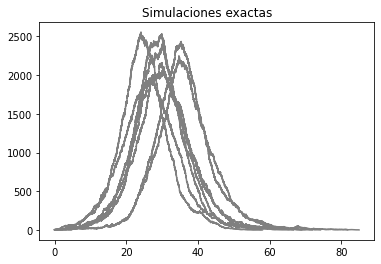

In [9]:
N=10**5
S_0=N-2
I_0=N-S_0
beta=1.25
gamma=1
for k in range(10):
    H=Gillespie_First_Reaction(N,S_0,I_0,1.25,1)
    while(len(H)<10):
        H=Gillespie_First_Reaction(N,S_0,I_0,1.25,1)
    H=pd.DataFrame(H,columns=['time','S(t)','I(t)'])
    plt.plot(H['time'],H['I(t)'], 'gray')
plt.title('Simulaciones exactas')
plt.show()

## Método directo para SIR markoviano en redes

In [10]:
import networkx as nx

In [25]:
N=10**3
G=nx.random_degree_sequence_graph(np.random.poisson(10,size=N))

In [28]:
np.random.seed(0)
X_I_indexes=np.random.choice(N,size=5,replace=False)

In [31]:
X_I_indexes

array([993, 859, 298, 553, 672])

In [29]:
for k in range(N):
    if k in X_I_indexes:
        G.nodes[k]['Estado:']='Infeccioso'
    else:
        G.nodes[k]['Estado:']='Susceptible'

In [51]:
G.has_edge(0,0)=={}

False

In [52]:
num_cont_inf_por_indice=np.zeros(N)
for i in range(N):
    for j in X_I_indexes:
        if (G.has_edge(i,j)):
            num_cont_inf_por_indice[i]+=1

In [54]:
#num_cont_inf_por_indice

In [32]:
#G.nodes.data()
for i in range(N):
    for j in range(N):
        if G.

In [ ]:
def Gillespie_Direct_Method_Network(beta,gamma,G_network_initial=nx.Graph(),T=np.inf):
    #X_R=N-X_S-X_I
    #tiempo
    flag=True
    t=0
    X_I=len(X_I_indexes)
    Historia=[[0,X_S,X_I]]#Lets focus on cuantities.
    
    while(flag):
        tau=np.random.exponential(1/((beta/N)*X_S*X_I+gamma*X_I))
        p=np.random.uniform(0,1)
        if(p<(beta*X_S/N)/((beta/N)*X_S+gamma)):#Infeccion
            X_S+=-1
            X_I+=1
        else:
            X_I-=1
        t+=tau
        Historia.append([t,X_S,X_I])
        if(X_S==0 or X_I==0 or t>T):
            flag=False
    return Historia

### Ejemplo

## Método directo para SIR no-markoviano.



## Método directo para SIR no-markoviano en redes